
# Notebook 2: Exploratory Data Analysis

Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

## Summary: ##    
In this notebook I read and explore the data set deeply to establish a strategy for my feature engineering. This is a continuation from my initial baseline notebook where i did a soft EDA, mainly addressing null values, then running a basic linear regression to predict the 'SalesPrice' from the test training set. Below is an outline summarizing the two main parts of this notebook

**Pt.1 Reading the dataset**
The data set included from Kaggle includes a training.csv (1460x81) and a test.csv file (1459x80). The data types include floats (3), integers(35) and categorical objects (43). 

**Pt.2 Missing Data**
The majority of the NA/missing data is observed within the object data type. It's my assumption that most of these are a mix of Nominal data where the entries carry no numerical value and Oridinal which do (i.e OverallQuality)

**Pt.3 Data Visualization** 
 
<u>*a.Correlation Heatmap*</u> I executed a correlation matrix with the training data set and the features that demonstrated the highest correlation to Saleprice is  ['GrLivArea','OverallQual', '1stFlrSF', 'GarageCars']  

<u>*b.Pairwise Plots:*</u> I executed a pairwise plot utilizing the features with the highest correlation to sales price to gather additional insight. The output of the Pairwise plot included histograms, and scatter plots. Each histogram resembles a bell shape of some sort which is indicative of a normal distribution. Each scatter plot displayed a positive increase directionally. 

<u>*c.Linear regression Plot:*</u> GrLivArea(X), with SalesPrice(Y). We noticed two data outliers where an extremely high Ground Living Area resulted to an extremely low sales price. This is something I'll consider addressing when doing feature engineering. 

<u>*d.Plotting OverallQual with Sales Price:*</u> We observe a positive with an increase which makes a lot of sense
Since this feature is ordinal, I will utilize dummy variables encoding during the feature engineering




In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn import linear_model as lm
from sklearn import preprocessing
from sklearn import metrics

## Pt. 1 Read the Data Set
- create train_data and test_data objects
- checking the shape, features, and data types
- are there any null values?

In [2]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques

train_data = pd.read_csv('train.csv',na_values=['?',''],delimiter=',',delim_whitespace=False)
test_data = pd.read_csv('test.csv',na_values=['?',''],delimiter=',',delim_whitespace=False)

In [3]:
train_data.shape

(1460, 81)

In [4]:
test_data.shape

(1459, 80)

In [5]:
#what are the data types?
dtype = train_data.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [6]:
#display head
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Pt.2 Missing Values

### Missing int64

In [7]:
##Looking at any missing values from the int dtypes
int_features= train_data.select_dtypes(include="int64")
int_features.columns

print("--Missing int64 entries--")
missing_percent = pd.DataFrame(int_features.isna().mean(axis=0)*100, columns=["Missing %"])
total_missing = pd.DataFrame(int_features.isna().sum(axis=0),columns=["Total Missing"])
int_misstable = pd.concat([missing_percent,total_missing],axis = 1)
int_misstable.loc[int_misstable['Total Missing'] > 0,:].sort_values(by = "Missing %", ascending = False)

--Missing int64 entries--


,Missing %,Total Missing


### Missing Object dtypes

In [8]:
cat_features= train_data.select_dtypes(include="object")
print("--Missing categorical entries--")
missing_percent = pd.DataFrame(cat_features.isna().mean(axis=0)*100, columns=["Missing %"])
total_missing = pd.DataFrame(cat_features.isna().sum(axis=0),columns=["Total Missing"])
cat_misstable = pd.concat([missing_percent,total_missing],axis = 1)
cat_misstable.loc[cat_misstable['Total Missing'] > 0,:].sort_values(by = "Missing %", ascending = False)


--Missing categorical entries--


,Missing %,Total Missing
PoolQC,99.520548,1453
MiscFeature,96.301370,1406
Alley,93.767123,1369
Fence,80.753425,1179
FireplaceQu,47.260274,690
GarageType,5.547945,81
GarageFinish,5.547945,81
GarageQual,5.547945,81
GarageCond,5.547945,81
BsmtExposure,2.602740,38


In [9]:
float_features= train_data.select_dtypes(include="float")
print("--Missing float entries--")
missing_percent = pd.DataFrame(float_features.isna().mean(axis=0)*100, columns=["Missing %"])
total_missing = pd.DataFrame(float_features.isna().sum(axis=0),columns=["Total Missing"])
float_misstable = pd.concat([missing_percent,total_missing],axis = 1)
float_misstable.loc[float_misstable['Total Missing'] > 0,:].sort_values(by = "Missing %", ascending = False)

--Missing float entries--


,Missing %,Total Missing
LotFrontage,17.739726,259
GarageYrBlt,5.547945,81
MasVnrArea,0.547945,8


## Pt.3 Correlation Matrix of Data Featuers
- What features have the largest correltionship with the sales price?

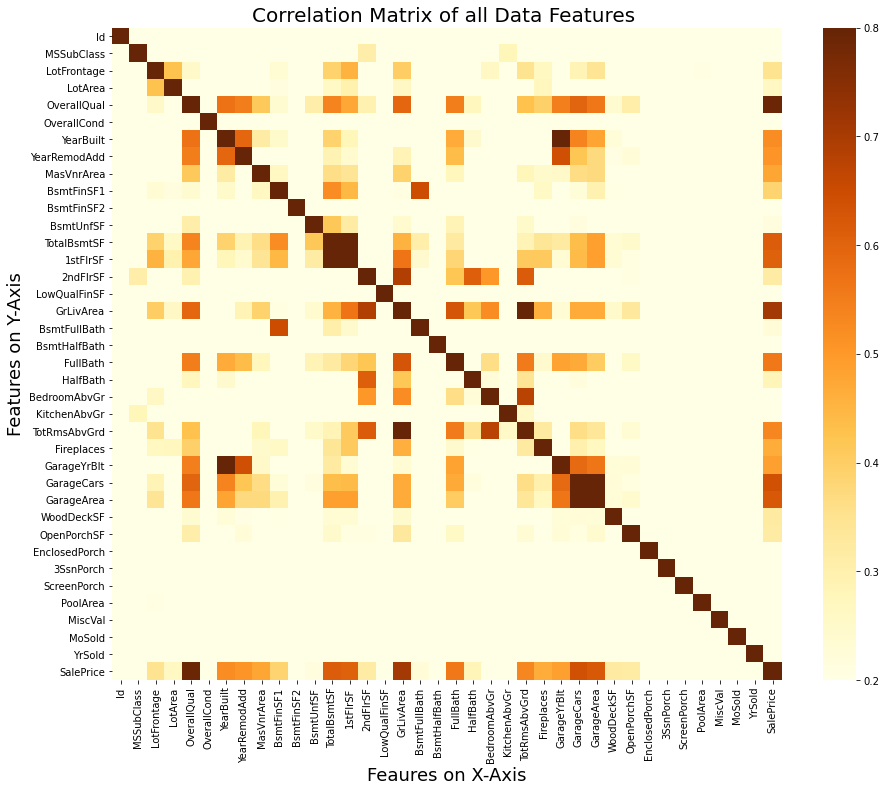

In [10]:
plt.subplots(figsize=(15, 12))
sns.heatmap(train_data.corr(), vmin=0.2, vmax=0.8, cmap = "YlOrBr")
plt.xlabel('Feaures on X-Axis',fontsize= 18)
plt.ylabel('Features on Y-Axis',fontsize= 18)
plt.title('Correlation Matrix of all Data Features ', fontsize= 20);

In [11]:
#train_data.corr()


**Independent Features with strong correlation to SalePrice:**  
-The features with the highest correlation(darkest squares) include "OverallQual" and "GrLivArea".   
-The features with a medium-high correlation(medium-dark squares) include "1stFlrSF", and "GarageCars".

**Feature Colinearity:**   
Based on the heatmap, we see that there are features that share strong correlationships:  
-- YearBuilt / GarageYrBlt  
-- TotalBsmtSF / 1stFirSF  
-- GarageCar / GarageArea

For the final dataset I will be omitting GarageYrBlt, TotalBsmtSF, and GarageCar to limit issues with colinearity.

### b. Plotting Pairwise relationship between SalePrice GrLivArea, OverallQual
-# plot dependent variable, sales prices to see how it's distributed. Then plot correlations w. highly correlated variables


Taking the natural log of the sales price, we can clearly see a normal distribution  

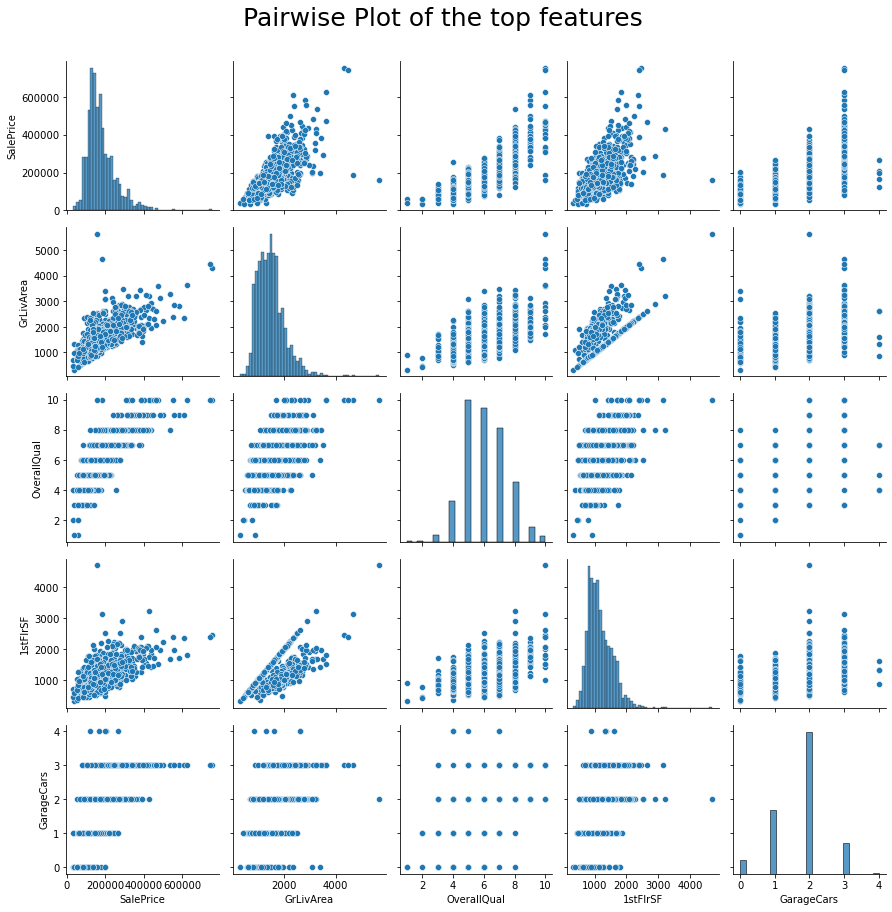

In [12]:
#Scatter plot of thr most important features
highest_corr = ['SalePrice','GrLivArea','OverallQual', '1stFlrSF', 'GarageCars']
sns.pairplot(train_data[highest_corr])
plt.suptitle('Pairwise Plot of the top features ',x=0.5, y=1.01, verticalalignment='top', fontsize= 25)
plt.tight_layout()
plt.show();

**notes**  
- each histogram resembles a bell shape of some sort which is indicative of a normal distribution
- we observe a positive increase in sales price for all scatter plots

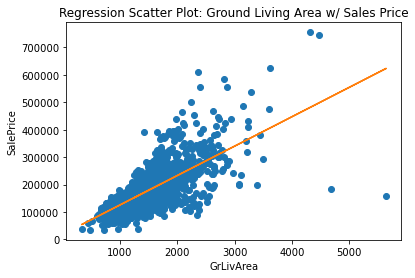

In [13]:
#Plotting Ground Living Area with Sales Price wiht a linear regression line
x=train_data['GrLivArea']
y=train_data['SalePrice']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.ylabel('SalePrice', fontsize= 10)
plt.xlabel('GrLivArea', fontsize= 10)
plt.title('Regression Scatter Plot: Ground Living Area w/ Sales Price', fontsize= 12)
plt.show();

**notes**   
-Looking closely at the relationship between the size of the ground living area and sale price we notice two outliers. It doesn't make sense for the two houses with the largest ground living area to have the cheapest sales price. There needs to be some additional digging
To address this during feature engineering, we can set a threshold to remove them so it doesn't interfear with the prediction algorithm. 

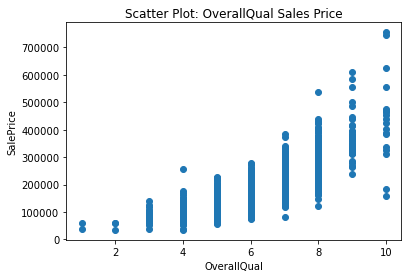

In [14]:
#Plotting OverallQual with Sales Price 
plt.scatter(x=train_data['OverallQual'],
            y=train_data['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: OverallQual Sales Price', fontsize= 12)
plt.show();

**Note**  
- We observe a positive with an increase which makes a lot of sense
-Since this feature is a categorical-numeric data type, I will utilize dummy variables during the feature engineering